

```
python predict_simplify.py \
    --condition_model /srv/scratch6/kew/ats/fudge/discriminators_lp/newsela_abl_40000_l4_article_paragraphs \
    --generation_model /srv/scratch6/kew/ats/fudge/generators/bart_large_muss_mined_en \
    --condition_lambda 5 \
    --num_beams 1 \
    --num_return_sequences 1 \
    --input_text "Memorial West's class is one of several programs offered through hospitals to help children stay healthy through exercise and proper eating." \
    --analysis_file analysis/fudge_decoding/fudge_decoding.json \
    --precondition_topk 10
    
python predict_simplify.py \
    --condition_model /srv/scratch6/kew/ats/fudge/discriminators_lp/newsela_abl_40000_l4_article_paragraphs \
    --generation_model /srv/scratch6/kew/ats/fudge/generators/bart_large_muss_mined_en \
    --condition_lambda 5 \
    --num_beams 1 \
    --num_return_sequences 1 \
    --input_text "For instance, he said, Ames scientists could devise tools similar to their CheMin device aboard the Mars rover that analyzes the composition of Martian rocks." \
    --analysis_file analysis/fudge_decoding/fudge_decoding.json \
    --precondition_topk 10
```

In [34]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy
# import torch


In [35]:
analysis_file = '/home/user/kew/INSTALLS/fudge/analysis/fudge_decoding/fudge_decoding.json'

data = []
with open(analysis_file, 'r', encoding='utf8') as inf:
    for line in inf:
        data.append(json.loads(line.strip()))
        
# print(len(data))
print(f'Output sentence with {len(data)} prediction steps: \n\t{" ".join([d["prev_token"] for d in data])}')

Output sentence with 31 prediction steps: 
	</s> <s> <s> <s> For  example ,  he  said ,  Ames  scientists  could  come  up  with  tools  like  their  Che Min  device  aboard  Mars  rover  that  tests  the  Martian  rocks .


In [43]:
sent = [d["prev_token"] for d in data] + ['</s>']
print(sent)

['</s>', '<s>', '<s>', '<s>', 'For', ' example', ',', ' he', ' said', ',', ' Ames', ' scientists', ' could', ' come', ' up', ' with', ' tools', ' like', ' their', ' Che', 'Min', ' device', ' aboard', ' Mars', ' rover', ' that', ' tests', ' the', ' Martian', ' rocks', '.', '</s>']


In [44]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

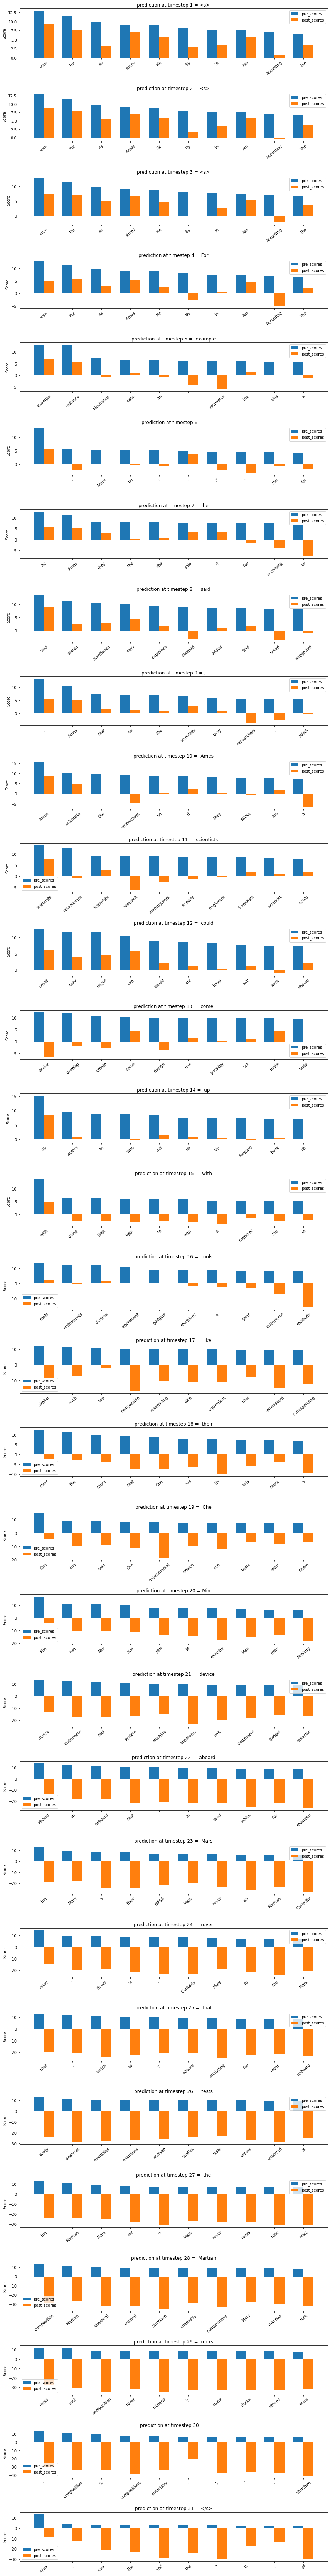

In [49]:
timesteps = len(data)
top_k = 10
fig, axes = plt.subplots(nrows=timesteps, ncols=1, figsize=(12, 3*timesteps), sharex=False, tight_layout=True)

hyp = 0
x = np.arange(top_k)  # the label locations
width = 0.35  # the width of the bars

for i in range(len(data))[:timesteps]:
#     print(data[i]['time_step'])
    tokens = data[i]['top_tokens'][hyp][:top_k]
#     pre_scores = softmax(np.array(data[i]['pre_scores'][hyp]))[:top_k]
#     post_scores = softmax(np.array(data[i]['post_scores'][hyp]))[:top_k]
    pre_scores = np.array(data[i]['pre_scores'][hyp][:top_k])
    post_scores = np.array(data[i]['post_scores'][hyp][:top_k])
    axes[i].bar(x-width/2, pre_scores, width, label='pre_scores', align='center')
    axes[i].bar(x+width/2, post_scores, width, label='post_scores', align='center')
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    axes[i].set_ylabel('Score')
    axes[i].set_title(f'prediction at timestep {i+1} = {sent[i+1]}')
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(tokens, rotation=40)
    axes[i].legend()
    
fig.savefig('/home/user/kew/INSTALLS/fudge/analysis/plots/decoding_example_sentence.pdf', dpi=300)